In [48]:
from sklearn.datasets import make_classification

import numpy as np 

In [49]:
X,y  = make_classification(n_samples=1000 , n_features=2 , n_informative=1 , n_redundant=0 , n_classes=2 , n_clusters_per_class=1 , random_state=41 , hypercube=False , class_sep=10)

In [50]:
y.shape

(1000,)

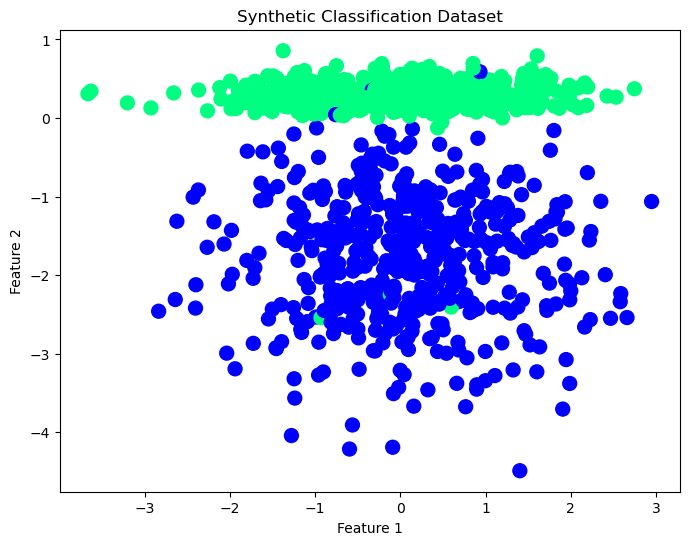

In [51]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,6))
plt.scatter(X[: , 0] , X[: , 1], c=y , cmap='winter',s=100)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Classification Dataset")
plt.show()

In [52]:
def step(z):
  return 1  if z>0 else 0 


In [53]:
def perceptron(X,y):

  

  X = np.insert(X,0,1,axis=1)
  weights=np.ones(X.shape[1])
  lr = 0.1

  for i in range(0,1000):
    j = np.random.randint(0,100)
    y_hat = step(np.dot(X[j] , weights))
    weights = weights+lr*(y[j]-y_hat)*X[j]

  return weights[0],weights[1:]


In [54]:
intercept_,coef_ = perceptron(X,y)

In [55]:
print(coef_)

[0.37591768 1.50709066]


In [56]:
print(intercept_)

0.7000000000000001


In [57]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [58]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input+b


(-3.0, 2.0)

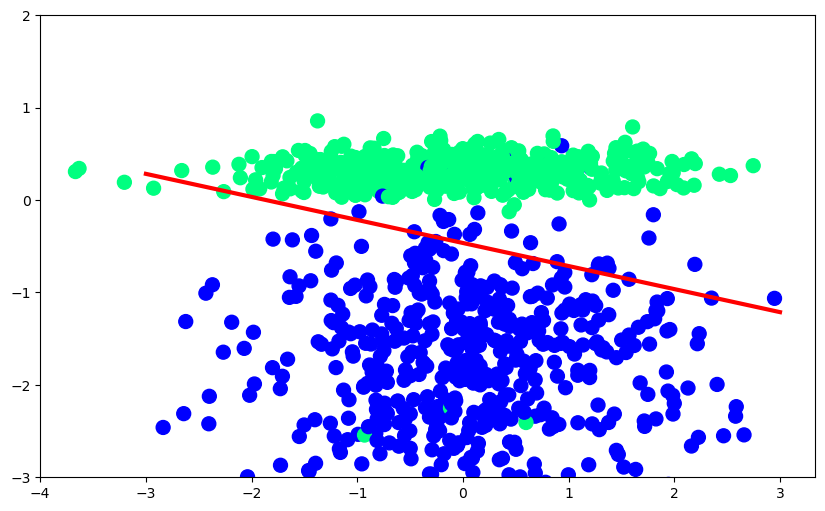

In [59]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red' ,linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [60]:
def perceptron(X,y):

  m = []
  b=[]
  

  X = np.insert(X,0,1,axis=1)
  weights=np.ones(X.shape[1])
  lr = 0.1

  for i in range(0,1000):
    j = np.random.randint(0,100)
    y_hat = step(np.dot(X[j] , weights))
    weights = weights+lr*(y[j]-y_hat)*X[j]

    m.append(-(weights[1]/weights[2]))
    b.append(-(weights[0]/weights[2]))

  return m,b


In [61]:
m,b = perceptron(X,y)

In [62]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [63]:
!pip install pillow


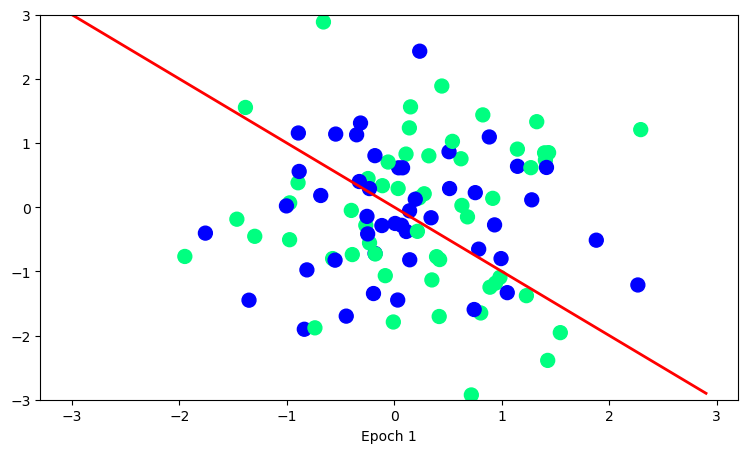

In [64]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Example data — replace with your own
m = np.linspace(-1, 1, 100)
b = np.linspace(0, 1, 100)
X = np.random.randn(100, 2)
y = np.random.randint(0, 2, 100)

fig, ax = plt.subplots(figsize=(9, 5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i * m[0] + b[0]

# Scatter and initial line
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
line, = ax.plot(x_i, y_i, 'r-', linewidth=2)
plt.ylim(-3, 3)

def update(i):
    label = f'Epoch {i+1}'
    line.set_ydata(x_i * m[i] + b[i])
    ax.set_xlabel(label)
    return line,

# ✅ assign to variable that stays alive
anim = FuncAnimation(fig, update, frames=len(m), interval=100, blit=True, repeat=True)

# ✅ show first, then optionally save
plt.show()

# ✅ optional: save AFTER show
# anim.save('training.gif', writer='pillow', fps=30)
